In [1]:
# imports
import numpy as np
from numpy.linalg  import inv
from numpy import matmul as mul
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from mpl_toolkits import mplot3d


# Modeling with outliers

In [2]:
# loading the data
df = pd.read_csv('data.csv',sep=';')

# getting data ready for modeling
df.rename({'Temp F':'x1','Insulation':'x2','Oil':'y'},axis=1,inplace=True)
df['ones'] = 1
df[['x1^2','x2^2']] = df[['x1','x2']].pow(2)
df['x1x2'] = df.x1*df.x2

In [3]:
df.head()

,y,x1,x2,ones,x1^2,x2^2,x1x2
0,275,40,4,1,1600,16,160
1,360,27,4,1,729,16,108
2,160,40,10,1,1600,100,400
3,40,73,6,1,5329,36,438
4,90,65,7,1,4225,49,455


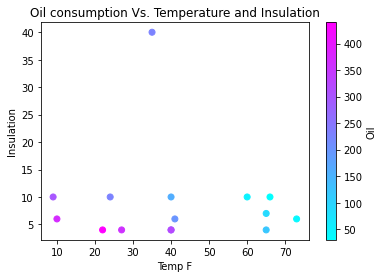

In [4]:
# plotting data
plt.scatter(df.x1,df.x2,c=df.y,cmap='cool')
cb = plt.colorbar()
cb.set_label('Oil')
plt.title('Oil consumption Vs. Temperature and Insulation')
plt.xlabel('Temp F')
plt.ylabel('Insulation')
plt.savefig("g1.png",dpi=300)
plt.show()

In [5]:
# fitting models
# a.linear model     (y = b0 + b1x1 + b2x2)
X = df[['ones','x1','x2']].values
y = df['y'].values
Bl = mul( inv(mul(X.T,X)) , mul(X.T,y) )
print("model parameters are:\nb0: {}\nb1: {}\nb2: {}".format(Bl[0],Bl[1],Bl[2]))

model parameters are:
b0: 464.19406247601137
b1: -5.535104760053275
b2: -2.44260222360964


In [6]:
#b.quadratic model  (y = b0 + b1x1 + b2x2 + b3x1² + b4x2² + b5x1x2)
X = df[['ones','x1','x2','x1^2','x2^2','x1x2']].values
y = df['y'].values
Bq = mul( inv(mul(X.T,X)) , mul(X.T,y) )
print("model parameters are:\nb0: {}\nb1: {}\nb2: {}\nb3: {}\nb4: {}\nb5: {}".format(Bq[0],Bq[1],Bq[2],Bq[3],Bq[4],Bq[5]))

model parameters are:
b0: 684.170328603439
b1: -6.328428174284966
b2: -43.427645587997176
b3: -0.012005090994112066
b4: 0.7176277689506065
b5: 0.2652028380317901


In [7]:
# building a predict function
def predict(x1,x2,B,quadratic=False):
    if not quadratic:
        return B[0] + B[1]*x1 + B[2]*x2
    else:
        return B[0] + B[1]*x1 + B[2]*x2 + B[3]*x1**2 + B[4]*x2**2 + B[5]*x1*x2

In [8]:
# R² values
y_hat_l = predict(df.x1,df.x2,Bl)
y_hat_q = predict(df.x1,df.x2,Bq,quadratic=True)
y_bar = y.mean()

ss_tot = ((y-y_bar)**2).sum()
ss_exp_l = ss_tot - (y-y_hat_l).pow(2).sum()
ss_exp_q = ss_tot - (y-y_hat_q).pow(2).sum()

R2_l = ss_exp_l/ss_tot
R2_q = ss_exp_q/ss_tot

print("R2 Value of linear model is {} and of quadratic model is {}".format(R2_l,R2_q))

R2 Value of linear model is 0.7813006444981381 and of quadratic model is 0.9760009895565491


In [9]:
# predict when temperature is 10 Fahrenheit and the insulation is 5 inches.
pred_l = predict(10,5,Bl)
pred_q = predict(10,5,Bq,quadratic=True)
print("At Temp=10 and Insulation=5 Oil consumption prediction of linear model is {} \nand of quadratic model is {}".format(pred_l,pred_q))

At Temp=10 and Insulation=5 Oil consumption prediction of linear model is 396.6300037574304 
and of quadratic model is 433.7481459465469


# Modeling after removing outliers

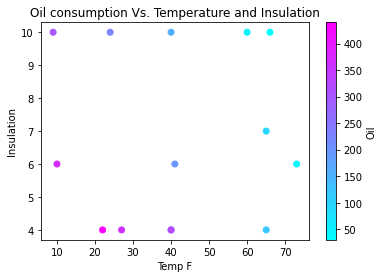

In [10]:
# 7.outlier removal
df2 = df.copy()
df2 = df2[df2.x2<20]

# plot after removal
plt.scatter(df2.x1,df2.x2,c=df2.y,cmap='cool')
cb = plt.colorbar()
cb.set_label('Oil')
plt.title('Oil consumption Vs. Temperature and Insulation')
plt.xlabel('Temp F')
plt.ylabel('Insulation')
plt.savefig("g2.png",dpi=300)
plt.show()

In [11]:
# rebuild models
#   a.linear model     (y = b0 + b1x1 + b2x2)
Xo = df2[['ones','x1','x2']].values
yo = df2['y'].values
Blo = mul( inv(mul(Xo.T,Xo)) , mul(Xo.T,yo) )
print("model parameters are:\nb0: {}\nb1: {}\nb2: {}".format(Blo[0],Blo[1],Blo[2]))

model parameters are:
b0: 595.0658008177229
b1: -5.418283557996045
b2: -23.04715979678346


In [12]:
#   b.quadratic model  (y = b0 + b1x1 + b2x2 + b3x1² + b4x2²)
Xo = df2[['ones','x1','x2','x1^2','x2^2','x1x2']].values
yo = df2['y'].values
Bqo = mul( inv(mul(Xo.T,Xo)) , mul(Xo.T,yo) )
print("model parameters are:\nb0: {}\nb1: {}\nb2: {}\nb3: {}\nb4: {}\nb5: {}".format(Bqo[0],Bqo[1],Bqo[2],Bqo[3],Bqo[4],Bqo[5]))

model parameters are:
b0: 803.6077450234588
b1: -7.133437416762604
b2: -78.57821309235806
b3: -0.0019889864627291587
b4: 3.1578431442833335
b5: 0.2740962264889859


In [13]:
# R² values
y_hat_l = predict(df2.x1,df2.x2,Blo)
y_hat_q = predict(df2.x1,df2.x2,Bqo,quadratic=True)
y_bar = yo.mean()

ss_tot = ((yo-y_bar)**2).sum()
ss_exp_l = ss_tot - (yo-y_hat_l).pow(2).sum()
ss_exp_q = ss_tot - (yo-y_hat_q).pow(2).sum()

R2_l = ss_exp_l/ss_tot
R2_q = ss_exp_q/ss_tot
print("R2 Value of linear model is {} and of quadratic model is {}".format(R2_l,R2_q))

R2 Value of linear model is 0.9603400980396692 and of quadratic model is 0.9798334458354367


In [14]:
# predict when temperature is 10 Fahrenheit and the insulation is 5 inches.
pred_l = predict(10,5,Blo)
pred_q = predict(10,5,Bqo,quadratic=True)
print("At Temp=10 and Insulation=5 Oil consumption prediction of linear model is {} \nand of quadratic model is {}".format(pred_l,pred_q))

At Temp=10 and Insulation=5 Oil consumption prediction of linear model is 425.64716625384517 
and of quadratic model is 431.8342966793022


# Checking results with sklearn

In [15]:
# with outliers
Xl = df[['ones','x1','x2']].values
Xq = df[['ones','x1','x2','x1^2','x2^2','x1x2']].values
model_l = LinearRegression()
model_l.fit(Xl,y)
model_q = LinearRegression()
model_q.fit(Xq,y)
Bl_,Bq_ = model_l.coef_,model_q.coef_
print("linear model parameters are:\nb0: {}\nb1: {}\nb2: {}\n".format(model_l.intercept_,Bl_[1],Bl_[2]))
print("quadratic model parameters are:\nb0: {}\nb1: {}\nb2: {}\nb3: {}\nb4: {}\nb5: {}\n".format(model_l.intercept_,Bq_[1],Bq_[2],Bq_[3],Bq_[4],Bq_[5]))
print("R2 Value of linear model is {} and of quadratic model is {}".format(r2_score(y,model_l.predict(Xl)),r2_score(y,model_q.predict(Xq))))

linear model parameters are:
b0: 464.19406247601086
b1: -5.535104760053261
b2: -2.442602223609637

quadratic model parameters are:
b0: 464.19406247601086
b1: -6.32842817428602
b2: -43.42764558800255
b3: -0.01200509099410736
b4: 0.7176277689506454
b5: 0.2652028380318672

R2 Value of linear model is 0.7813006444981381 and of quadratic model is 0.976000989556549


In [16]:
# without outliers
Xlo = df2[['ones','x1','x2']].values
Xqo = df2[['ones','x1','x2','x1^2','x2^2','x1x2']].values
yo = df2['y'].values
model_l = LinearRegression()
model_l.fit(Xlo,yo)
model_q = LinearRegression()
model_q.fit(Xqo,yo)
Blo_,Bqo_ = model_l.coef_,model_q.coef_
print("linear model parameters are:\nb0: {}\nb1: {}\nb2: {}\n".format(model_l.intercept_,Blo_[1],Blo_[2]))
print("quadratic model parameters are:\nb0: {}\nb1: {}\nb2: {}\nb3: {}\nb4: {}\nb5: {}\n".format(model_l.intercept_,Bqo_[1],Bqo_[2],Bqo_[3],Bqo_[4],Bqo_[5]))
print("R2 Value of linear model is {} and of quadratic model is {}".format(r2_score(yo,model_l.predict(Xlo)),r2_score(yo,model_q.predict(Xqo))))

linear model parameters are:
b0: 595.0658008177224
b1: -5.418283557996038
b2: -23.04715979678337

quadratic model parameters are:
b0: 595.0658008177224
b1: -7.133437416763172
b2: -78.57821309236395
b3: -0.0019889864627219093
b4: 3.157843144283654
b5: 0.27409622648899273

R2 Value of linear model is 0.9603400980396692 and of quadratic model is 0.9798334458354367


# 3D plotting of data and model predictions

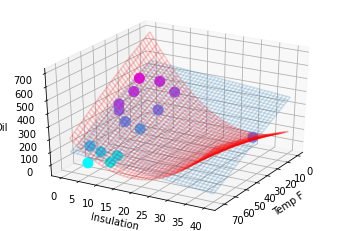

In [17]:
# with outliers
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(df.x1,df.x2,df.y,c=df.y,cmap='cool',s=100,alpha=1)
x1, x2 = np.meshgrid(np.arange(0,71), np.arange(0,41))
z1 = predict(x1,x2,Bl)
z2 = predict(x1,x2,Bq,quadratic=True)
ax.plot_wireframe(x1,x2,z1,alpha=0.2)
ax.plot_wireframe(x1,x2,z2,alpha=0.2,color='r')
ax.set(xlabel='Temp F', ylabel='Insulation', zlabel='Oil')
ax.view_init(30, 30)
plt.savefig("3D_1_30_30.png",dpi=300)
plt.show()

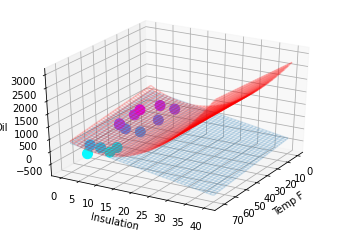

In [18]:
# without outliers
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(df2.x1,df2.x2,df2.y,c=df2.y,cmap='cool',s=100,alpha=1)
x1, x2 = np.meshgrid(np.arange(0,71), np.arange(0,41))
z1 = predict(x1,x2,Blo)
z2 = predict(x1,x2,Bqo,quadratic=True)
ax.plot_wireframe(x1,x2,z1,alpha=0.2)
ax.plot_wireframe(x1,x2,z2,alpha=0.2,color='r')
ax.set(xlabel='Temp F', ylabel='Insulation', zlabel='Oil')
ax.view_init(30, 30)
plt.savefig("3D_2_30_30.png",dpi=300)
plt.show()